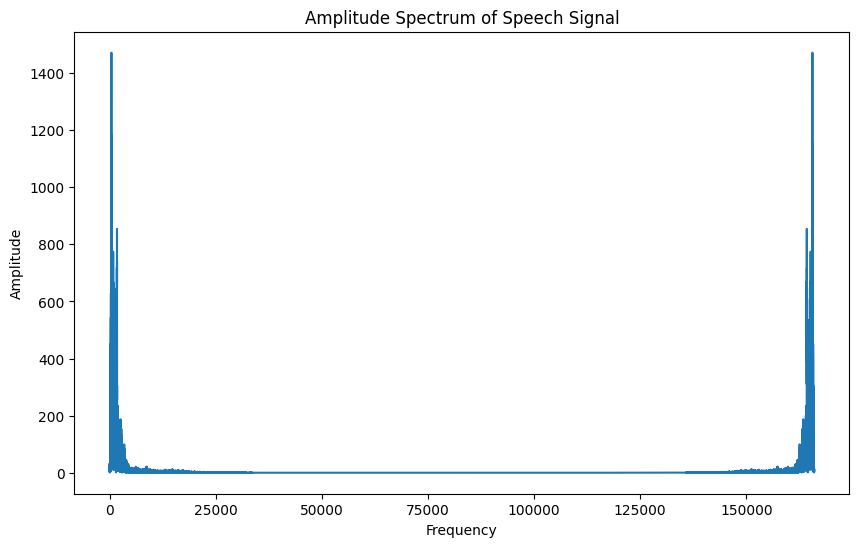

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal
speech_signal, sample_rate = librosa.load("/21036-ai.wav", sr=None)

spectrum = np.fft.fft(speech_signal)
amplitude_spectrum = np.abs(spectrum)
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


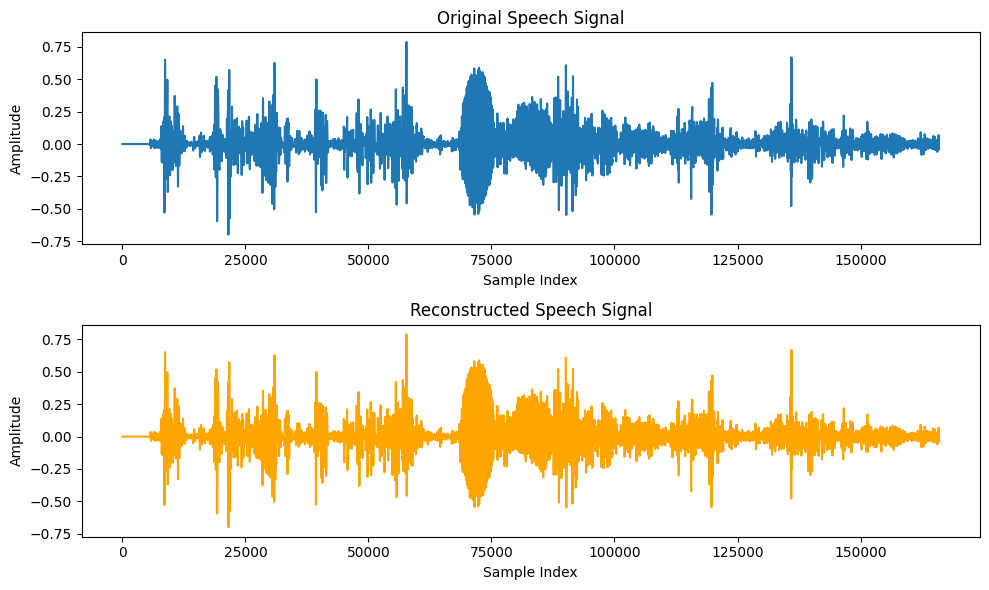

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
file_path = '/21036-ai.wav'
speech_signal, sampling_rate = librosa.load(file_path, sr=None)

# Compute the FFT
fft_result = np.fft.fft(speech_signal)

# Perform IFFT
ifft_result = np.fft.ifft(fft_result)

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(speech_signal, label='Original Signal')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Original Speech Signal")

plt.subplot(2, 1, 2)
plt.plot(ifft_result, label='Reconstructed Signal', color='orange')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Reconstructed Speech Signal")

plt.tight_layout()
plt.show()


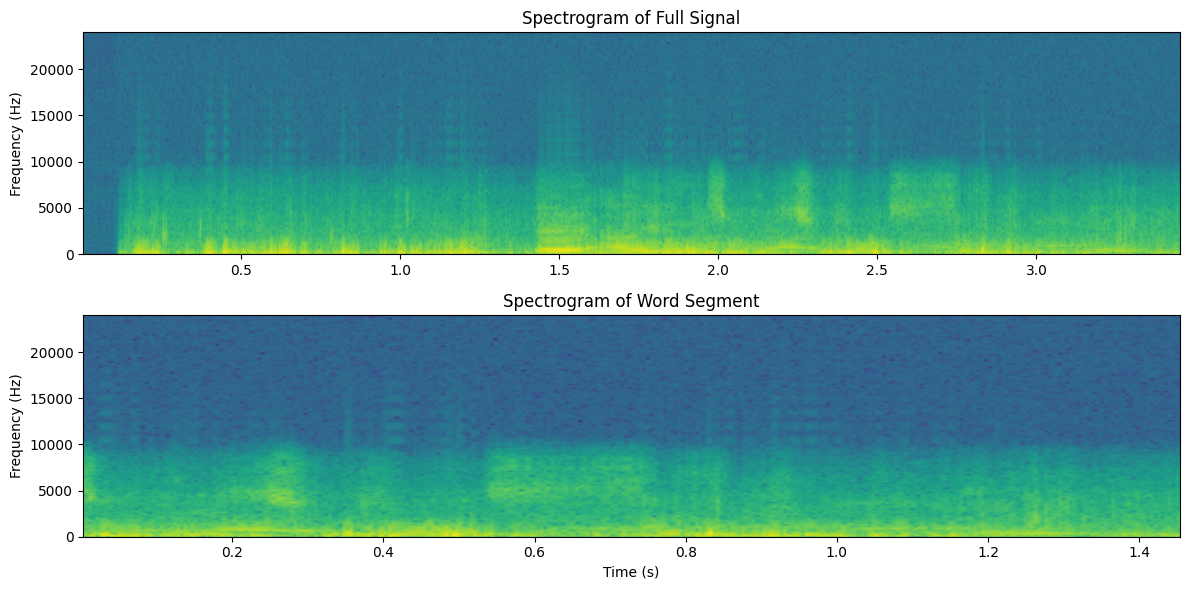

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

!pip install pydub

import pydub

def read_audio(file_path):
    a = pydub.AudioSegment.from_mp3(file_path)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    return a.frame_rate, y

file_path = '/21036-ai.wav'
sampling_rate, full_signal = read_audio(file_path)

start_time = 2.0  # Start time in seconds
end_time = 3.5    # End time in seconds

word_segment = full_signal[int(start_time * sampling_rate):int(end_time * sampling_rate)]

f_full, t_full, Sxx_full = spectrogram(full_signal, fs=sampling_rate)

f_word, t_word, Sxx_word = spectrogram(word_segment, fs=sampling_rate)

# Plot the spectrograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(t_full, f_full, 10 * np.log10(Sxx_full), shading='gouraud')
plt.title("Spectrogram of Full Signal")
plt.ylabel("Frequency (Hz)")

plt.subplot(2, 1, 2)
plt.pcolormesh(t_word, f_word, 10 * np.log10(Sxx_word), shading='gouraud')
plt.title("Spectrogram of Word Segment")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


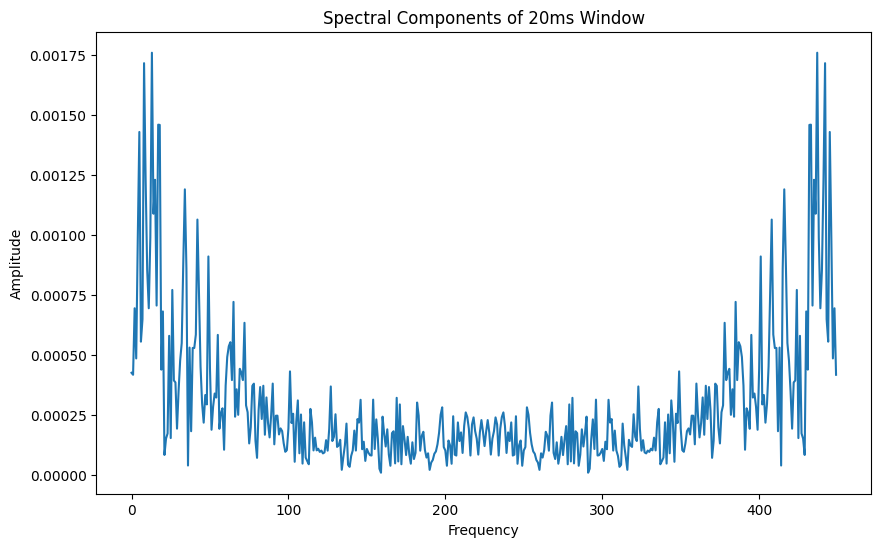

In [14]:
sample_rate = 22500
window_size = int(0.02 * sample_rate)
window = speech_signal[:window_size]
window_spectrum = np.fft.fft(window)
window_amplitude_spectrum = np.abs(window_spectrum)

plt.figure(figsize=(10, 6))
plt.plot(window_amplitude_spectrum)
plt.title('Spectral Components of 20ms Window')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

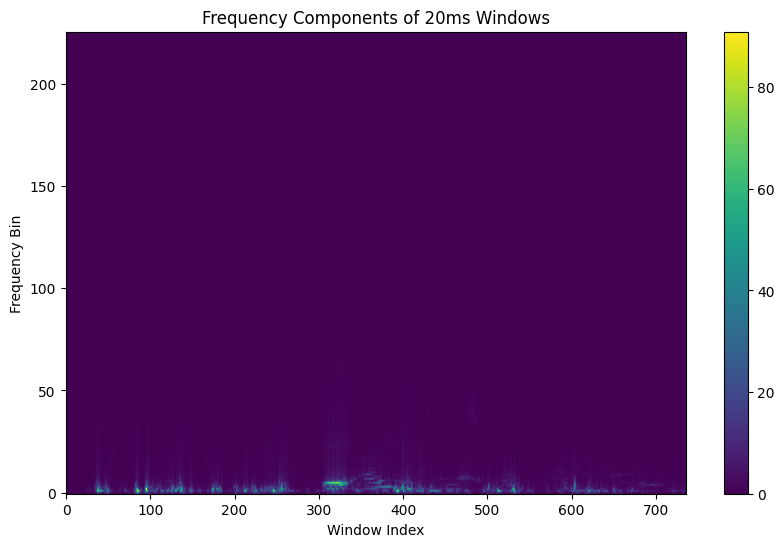

In [15]:
window_size = int(0.02 * sample_rate)  # 20 mili-second window
window_step = window_size // 2  # 50% overlap
num_windows = (len(speech_signal) - window_size) // window_step + 1
frequency_components = []

for i in range(num_windows):
    start = i * window_step
    end = start + window_size
    window = speech_signal[start:end]
    window_spectrum = np.fft.rfft(window)
    frequency_components.append(np.abs(window_spectrum))

frequency_components = np.array(frequency_components).T

# Plot the frequency components using a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(frequency_components, aspect='auto', origin='lower', cmap='viridis')
plt.title('Frequency Components of 20ms Windows')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.colorbar()
plt.show()

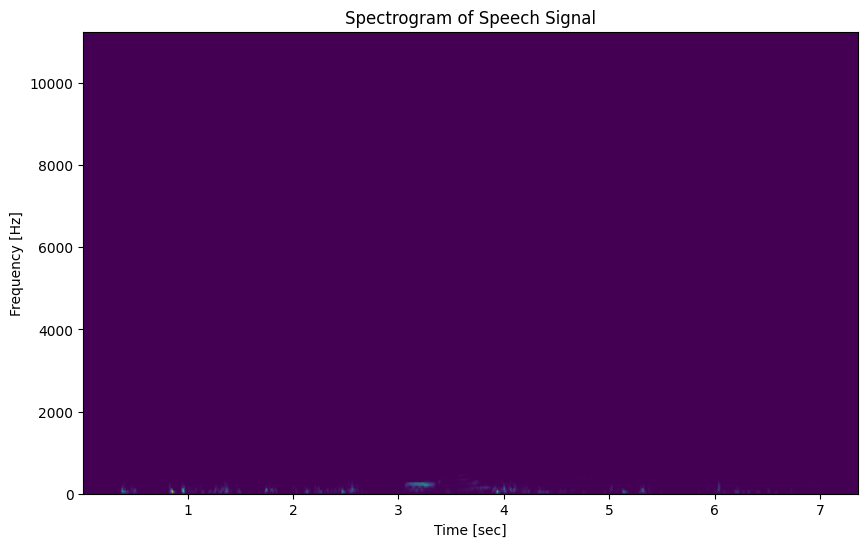

In [16]:
f, t, Sxx = signal.spectrogram(speech_signal, fs=sample_rate, nperseg=window_size, noverlap=window_size // 2)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.show()